# 포트폴리오 최적화와 성과 평가
- 알파팩터(alpha factor)는 알고리즘 전략을 거래로 변환해 매수 및 매도 포지션을 생성시키는 신호를 생성한다. 그 결과로 생성된 포트폴리오의 수익률과 리스크는 전략의 성공을 결정한다.
- 시장 상황에서 실행하기 전에 전략을 검증하려면 알고리즘이 성과를 만들고 입증하는 거래에 대해 시뮬레이션을 해본다.
- 전략 평가에는 전략의 파라미터를 최적화하기 위한 과거 데이터에 대한 백테스팅이 포함된다.
- 또한 새로운 표본 외 데이터에 대해 표본 내 성과를 입증하는 전진 분석(forward testing)도 포함된다.

> 목표 : 특정 과거 상황에 맞게 전략을 조정해 거짓 발견(false discovery)을 방지하는 것

- 포트폴리오 상황에서 양(+)의 자산 수익률은 음(-)의 가격 변동을 상쇄할 수 있다.
    - 한 자산에 대한 양(+)의 가격 변동은 다른 잣나에 대한 손실을 상쇄할 가능성이 높으며
    - 두 포지션 간의 상관관계는 더 낫다. (분산 투자))

> 기대된 수익률 수준에 대한 수익률의 표준 편차로 측정한 리스크를 최소화하고자 주어진 자산 집합에 대한 포틀폴리오 가중치를 선택하는 평균 분산 최적화

- 5장에서 다루는 내용
    * 포트폴리오 리스크와 수익률을 측정하는 방법에는 어떤 것이 있는가?
    * 평균 분산 최적화 대안들을 이용해 포트폴리오 가중치를 어떻게 관리하는가?
    * 포트폴리오 상황에서 자산 배분을 최적화하고자 머신러닝을 어떻게 사용하는가?
    * 집라인을 이용해 알파 팩터에 기반을 둔 거래 시뮬레이션과 포트폴리오를 어떻게 생성하는가?
    * 파이폴리오(pyfolio)를 이용해 포트폴리오 성과를 어떻게 평가하는가?

## 포트폴리오 성과를 측정하는 방법
- 투자와 거래에서 가장 일반적인 목표는 투자 포트폴리오의 수익과 리스크

### 단일 숫자로 리스크 수익 트레이드오프 포착
- 수익과 리스크 목표는 트레이드오프를 의미함
- 더 많은 리스크를 감수하면 일부 상황에서 더 높은 수익을 얻을 수 있지만 더 큰 하락을 의미하기도함

#### 샤프 비율(SR, Sharp Ratio)
- 포트폴리오의 기대 초과 수익률을 표준 편차로 측정되는 초과 수익률의 변동성과 비교하는 것
- 리스크를 감수한 단위당 평균초와 수익률로 보상을 측정함
- 기대수익률과 변동성은 관찰할 수 없어 과서 데이터(histoical data)를 사용해 추정할 수 있음
- 독립적으로 동일하게 분포된(IID, Independently and Identically Distributed) 수익률에 대해 통계적 유의성 검정을 위한 SR 추정치 분포의 편차는 대규모ㅓ 표본 통계 이론에 따르면 중심 극한 정리를 적용해 평균과 분산에 따른다.
- 월별 및 연간 데이터와 같이 서로 다른 빈도에 대한 SR을 비교해야 하는 경우 더 높은 빈도 SR에 더 낮은 빈도에 포함된 해당 기간수의 제곱근을 곱할 수 있다.
    - 월별 SR을 연간 SR로 변환하려면 sqrt(12)를 곱하고, 일별에서 월별 SR을 sqrt(12)로 괍한다.

#### 정보 비율(IR, Information Ratio)
- 정보 비율은 샤프비율과 유사하지만 무위험 이자율보다 벤치마크를 사용한다.  
<img src='./img/05-1.png'>

## 포트폴리오 리스크와 수익률 관리 방법
- 포트폴리오 관리는 벤치마크와 관련해 원하는 리스크 수익률 트레이드오프를 닰성하는 금융 상품의 포지션을 선택하고 크기를 조정하는 것을 목표로함
- 포트폴리오 매니저는 각 기간마다 분산 투자(diversification)를 최적화하는 포지션을 선택해 목표 수익을 달성하면서 리스크를 줄임
- 기간에 걸쳐 이러한 포지션은 목표 리스크 프로파일을 달성하거나 유지하고자 가격 변동으로 인한 가중치 변화를 설명할 때 리벨런싱(rebalancing)이 필요하다.

### 현대 포트폴리오 관리의 진화
- 분산 투자는 불완전한 상관관계를 이용해 한 자산의 이익이 다른 자산의 손실을 어떻게든 메울 수 있기 때문에 주어진 기대 수익률에 대한 리스크를 줄일 수 있게 해줌

#### 평균 분산 최적화
- 현대 포트폴리오 이론(MPT)은 주어진 기대 수익률에 대한 변동성을 최소화시키거나 주어진 수준의 변동성에 대해 수익률을 극대화시키는 최적의 포트폴리오 가중치 문제를 해결했다.
- 주요 필수 입력 변수 : 기대 자산 수익률, 표준 편차, 공분산 행렬
- 작동 원리
    - 포트폴리오 수익률의 분산이 자산의 공분산에 따라 달라지기 때문에 분산 투자 효과가 있음
    - 완전한 상관관계가 없는 자산을 포함함으로써 자산 분산의 가중 평균 이하로 줄일 수 있음

- 파이썬으로 효율적 프론티어 구하기
    - scipy.optimize.minimize와 자산 수익률의 과거 추정치, 표준편차, 공분산 행렬을 사용해 효율적 프론티어(efficient frontier)를 계산할 수 있음
    - scipy의 최소화 함수는 하나 이상의 입력 변수에서 단일 숫자를 출력하는 스칼라 함수에 대해 제약된 그리고 제약되지 않는 다양한 최적화 알고리즘을 구현함
    

# zipline MeanReversion Backtest

In the chapter 04, we introduced `Zipline` to simulate the computation of alpha factors from trailing cross-sectional market, fundamental, and alternative data.

Now we will exploit the alpha factors to derive and act on buy and sell signals using the custom MeanReversion factor developed in the last chapter.

## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys
import numpy as np
import pandas as pd
from pytz import UTC

from logbook import (NestedSetup, NullHandler, Logger, StreamHandler, StderrHandler, 
                     INFO, WARNING, DEBUG, ERROR)

from zipline import run_algorithm
from zipline.api import (attach_pipeline, 
                         date_rules, 
                         time_rules,
                         get_datetime,
                         order_target_percent,
                         pipeline_output, 
                         record, 
                         schedule_function, 
                         get_open_orders, 
                         calendars,
                         set_commission, 
                         set_slippage)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume

from pyfolio.utils import extract_rets_pos_txn_from_zipline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

## Logging Setup

In [ ]:
# setup stdout logging
format_string = '[{record.time: %H:%M:%S.%f}]: {record.level_name}: {record.message}'
zipline_logging = NestedSetup([NullHandler(level=DEBUG),
                               StreamHandler(sys.stdout, format_string=format_string, level=INFO),
                               StreamHandler(sys.stderr, level=ERROR)])
zipline_logging.push_application()
log = Logger('Algorithm')

## Algo Settings

In [ ]:
# Settings
MONTH = 21
YEAR = 12 * MONTH
N_LONGS = 50
N_SHORTS = 50
VOL_SCREEN = 500

In [ ]:
start = pd.Timestamp('2013-01-01', tz=UTC)
end = pd.Timestamp('2017-01-01', tz=UTC)
capital_base = 1e7

## Mean Reversion Factor

In [ ]:
class MeanReversion(CustomFactor):
    """Compute ratio of latest monthly return to 12m average,
       normalized by std dev of monthly returns"""
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        df = pd.DataFrame(monthly_returns)
        out[:] = df.iloc[-1].sub(df.mean()).div(df.std())

## Create Pipeline

The Pipeline created by the `compute_factors()` method returns a table with a long and a short column for the 25 stocks with the largest negative and positive deviations of their last monthly return from its annual average, normalized by the standard deviation. It also limited the universe to the 500 stocks with the highest average trading volume over the last 30 trading days. 

In [ ]:
def compute_factors():
    """Create factor pipeline incl. mean reversion,
        filtered by 30d Dollar Volume; capture factor ranks"""
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)
    return Pipeline(columns={'longs'  : mean_reversion.bottom(N_LONGS),
                             'shorts' : mean_reversion.top(N_SHORTS),
                             'ranking': mean_reversion.rank(ascending=False)},
                    screen=dollar_volume.top(VOL_SCREEN))

Before_trading_start() ensures the daily execution of the pipeline and the recording of the results, including the current prices.

In [ ]:
def before_trading_start(context, data):
    """Run factor pipeline"""
    context.factor_data = pipeline_output('factor_pipeline')
    record(factor_data=context.factor_data.ranking)
    assets = context.factor_data.index
    record(prices=data.current(assets, 'price'))

## Set up Rebalancing

The new rebalance() method submits trade orders to the exec_trades() method for the assets flagged for long and short positions by the pipeline with equal positive and negative weights. It also divests any current holdings that are no longer included in the factor signals:

In [ ]:
def rebalance(context, data):
    """Compute long, short and obsolete holdings; place trade orders"""
    factor_data = context.factor_data
    assets = factor_data.index
    
    longs = assets[factor_data.longs]
    shorts = assets[factor_data.shorts]
    divest = context.portfolio.positions.keys() - longs.union(shorts)
    log.info('{} | Longs: {:2.0f} | Shorts: {:2.0f} | {:,.2f}'.format(get_datetime().date(),
                                                                     len(longs), 
                                                                     len(shorts),
                                                                     context.portfolio.portfolio_value))

    exec_trades(data, assets=divest, target_percent=0)
    exec_trades(data, assets=longs, target_percent=1 / N_LONGS if N_LONGS else 0)
    exec_trades(data, assets=shorts, target_percent=-1 / N_SHORTS if N_SHORTS else 0)

In [ ]:
def exec_trades(data, assets, target_percent):
    """Place orders for assets using target portfolio percentage"""
    for asset in assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            order_target_percent(asset, target_percent)

## Initialize Backtest

The `rebalance()` method runs according to `date_rules` and `time_rules` set by the `schedule_function()` utility at the beginning of the week, right after market_open as stipulated by the built-in US_EQUITIES calendar (see docs for details on rules). 

You can also specify a trade commission both in relative terms and as a minimum amount. There is also an option to define slippage, which is the cost of an adverse change in price between trade decision and execution

In [ ]:
def initialize(context):
    """Setup: register pipeline, schedule rebalancing,
        and set trading params"""
    attach_pipeline(compute_factors(), 'factor_pipeline')
    schedule_function(rebalance,
                      date_rules.week_start(),
                      time_rules.market_open(),
                      calendar=calendars.US_EQUITIES)

    set_commission(us_equities=commission.PerShare(cost=0.00075, 
                                                   min_trade_cost=.01))
    set_slippage(us_equities=slippage.VolumeShareSlippage(volume_limit=0.0025, 
                                                          price_impact=0.01))

## Run Algorithm

The algorithm executes upon calling the run_algorithm() function and returns the backtest performance DataFrame.

In [ ]:
backtest = run_algorithm(start=start,
                         end=end,
                         initialize=initialize,
                         before_trading_start=before_trading_start,
                         bundle='quandl',
                         capital_base=capital_base)

[ 19:45:47.847522]: INFO: 2013-01-07 | Longs: 10 | Shorts:  2 | 10,000,000.00
[ 19:45:52.095417]: INFO: 2013-01-14 | Longs: 13 | Shorts:  3 | 10,027,422.36
[ 19:45:52.700469]: INFO: 2013-01-22 | Longs:  8 | Shorts:  5 | 10,097,663.57
[ 19:45:53.190897]: INFO: 2013-01-28 | Longs:  5 | Shorts: 14 | 10,106,150.06
[ 19:45:53.810739]: INFO: 2013-02-04 | Longs: 12 | Shorts: 11 | 10,135,417.26
[ 19:45:54.448141]: INFO: 2013-02-11 | Longs: 11 | Shorts: 13 | 10,182,644.42
[ 19:45:55.093475]: INFO: 2013-02-19 | Longs: 21 | Shorts: 11 | 10,127,755.45
[ 19:45:55.646754]: INFO: 2013-02-25 | Longs: 16 | Shorts:  8 | 10,180,357.23
[ 19:45:56.316751]: INFO: 2013-03-04 | Longs: 10 | Shorts: 10 | 10,200,300.19
[ 19:45:56.942645]: INFO: 2013-03-11 | Longs: 12 | Shorts:  7 | 10,240,453.13
[ 19:45:57.560857]: INFO: 2013-03-18 | Longs:  7 | Shorts:  7 | 10,150,394.01
[ 19:45:58.174192]: INFO: 2013-03-25 | Longs:  8 | Shorts:  7 | 10,149,029.25
[ 19:45:58.673395]: INFO: 2013-04-01 | Longs:  4 | Shorts:  6 | 

[ 19:47:00.983066]: INFO: 2015-01-20 | Longs: 12 | Shorts:  7 | 9,911,930.16
[ 19:47:01.477727]: INFO: 2015-01-26 | Longs: 11 | Shorts:  8 | 9,933,179.35
[ 19:47:02.097079]: INFO: 2015-02-02 | Longs: 18 | Shorts:  7 | 9,874,894.91
[ 19:47:02.753928]: INFO: 2015-02-09 | Longs: 15 | Shorts:  6 | 10,026,955.51
[ 19:47:03.391743]: INFO: 2015-02-17 | Longs: 12 | Shorts: 11 | 10,080,570.15
[ 19:47:03.912410]: INFO: 2015-02-23 | Longs: 13 | Shorts:  7 | 10,087,564.34
[ 19:47:04.539404]: INFO: 2015-03-02 | Longs: 16 | Shorts:  7 | 10,042,612.79
[ 19:47:05.185830]: INFO: 2015-03-09 | Longs: 12 | Shorts:  5 | 9,963,112.34
[ 19:47:05.953729]: INFO: 2015-03-16 | Longs: 15 | Shorts:  2 | 10,023,732.49
[ 19:47:06.644113]: INFO: 2015-03-23 | Longs: 10 | Shorts:  2 | 10,078,627.34
[ 19:47:07.381910]: INFO: 2015-03-30 | Longs: 13 | Shorts:  4 | 10,072,282.97
[ 19:47:07.875927]: INFO: 2015-04-06 | Longs: 12 | Shorts:  3 | 10,123,357.71
[ 19:47:08.473323]: INFO: 2015-04-13 | Longs:  5 | Shorts:  8 | 10,1

## Extract pyfolio Inputs

The `extract_rets_pos_txn_from_zipline` utility provided by `pyfolio` extracts the data used to compute performance metrics.

In [ ]:
returns, positions, transactions = extract_rets_pos_txn_from_zipline(backtest)

## Persist Results for use with `pyfolio`

In [ ]:
with pd.HDFStore('backtests.h5') as store:
    store.put('backtest/equal_weight', backtest)
    store.put('returns/equal_weight', returns)
    store.put('positions/equal_weight', positions)
    store.put('transactions/equal_weight', transactions)

## Plot Results

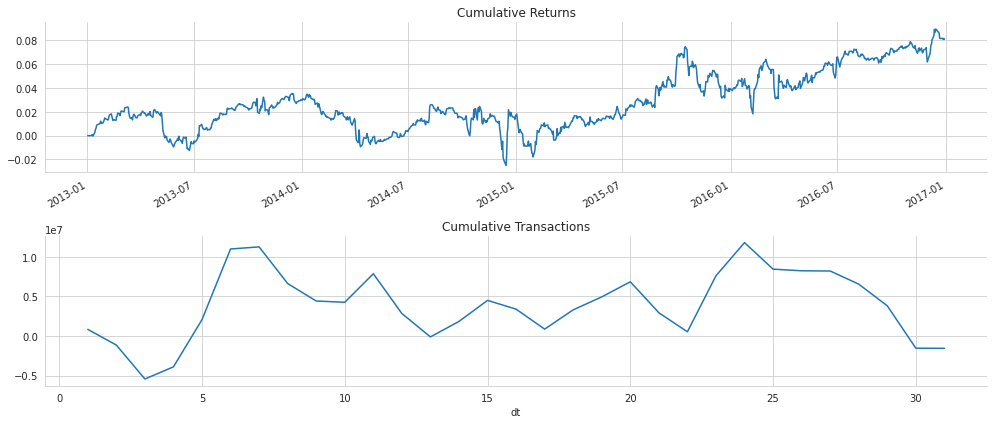

In [ ]:
fig, axes= plt.subplots(nrows=2, figsize=(14,6))
returns.add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Returns')
transactions.groupby(transactions.dt.dt.day).txn_dollars.sum().cumsum().plot(ax=axes[1], title='Cumulative Transactions')
fig.tight_layout()
sns.despine();

In [ ]:
positions.index = positions.index.date

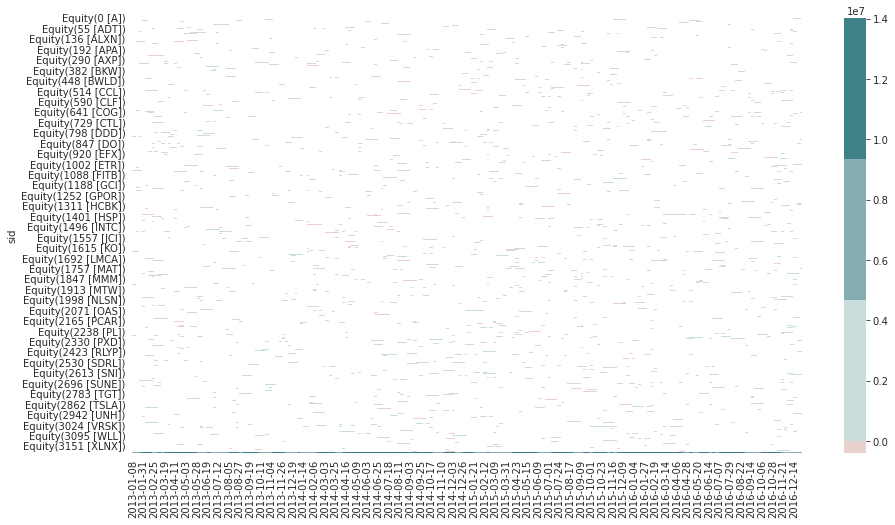

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(positions.replace(0, np.nan).dropna(how='all', axis=1).T, 
            cmap=sns.diverging_palette(h_neg=20, h_pos=200), ax=ax, center=0);

In [ ]:
positions.head()

sid,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(7 [AAP]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(13 [ABC]),Equity(20 [ABT]),Equity(21 [ACAD]),Equity(27 [ACE]),...,Equity(3156 [XOM]),Equity(3162 [XPO]),Equity(3165 [XRX]),Equity(3171 [YELP]),Equity(3172 [YHOO]),Equity(3175 [YUM]),Equity(3180 [ZBH]),Equity(3194 [ZNGA]),Equity(3197 [ZTS]),cash
2013-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.441446e+06
2013-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6505 entries, 2013-01-08 21:00:00+00:00 to 2016-12-30 21:00:00+00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   sid          6505 non-null   object             
 1   symbol       6505 non-null   object             
 2   price        6505 non-null   float64            
 3   order_id     6502 non-null   object             
 4   amount       6505 non-null   int64              
 5   commission   0 non-null      object             
 6   dt           6505 non-null   datetime64[ns, UTC]
 7   txn_dollars  6505 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 457.4+ KB


In the chapter 04, we introduced `Zipline` to simulate the computation of alpha factors from trailing cross-sectional market, fundamental, and alternative data.

Now we will exploit the alpha factors to derive and act on buy and sell signals using the custom MeanReversion factor developed in the last chapter.

## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys
import numpy as np
import pandas as pd
from pytz import UTC

from logbook import (NestedSetup, NullHandler, Logger, StreamHandler, StderrHandler, 
                     INFO, WARNING, DEBUG, ERROR)

from zipline import run_algorithm
from zipline.api import (attach_pipeline, 
                         date_rules, 
                         time_rules,
                         get_datetime,
                         order_target_percent,
                         pipeline_output, 
                         record, 
                         schedule_function, 
                         get_open_orders, 
                         calendars,
                         set_commission, 
                         set_slippage)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume

from pyfolio.utils import extract_rets_pos_txn_from_zipline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

## Logging Setup

In [ ]:
# setup stdout logging
format_string = '[{record.time: %H:%M:%S.%f}]: {record.level_name}: {record.message}'
zipline_logging = NestedSetup([NullHandler(level=DEBUG),
                               StreamHandler(sys.stdout, format_string=format_string, level=INFO),
                               StreamHandler(sys.stderr, level=ERROR)])
zipline_logging.push_application()
log = Logger('Algorithm')

## Algo Settings

In [ ]:
# Settings
MONTH = 21
YEAR = 12 * MONTH
N_LONGS = 50
N_SHORTS = 50
VOL_SCREEN = 500

In [ ]:
start = pd.Timestamp('2013-01-01', tz=UTC)
end = pd.Timestamp('2017-01-01', tz=UTC)
capital_base = 1e7

## Mean Reversion Factor

In [ ]:
class MeanReversion(CustomFactor):
    """Compute ratio of latest monthly return to 12m average,
       normalized by std dev of monthly returns"""
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        df = pd.DataFrame(monthly_returns)
        out[:] = df.iloc[-1].sub(df.mean()).div(df.std())

## Create Pipeline

The Pipeline created by the `compute_factors()` method returns a table with a long and a short column for the 25 stocks with the largest negative and positive deviations of their last monthly return from its annual average, normalized by the standard deviation. It also limited the universe to the 500 stocks with the highest average trading volume over the last 30 trading days. 

In [ ]:
def compute_factors():
    """Create factor pipeline incl. mean reversion,
        filtered by 30d Dollar Volume; capture factor ranks"""
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)
    return Pipeline(columns={'longs'  : mean_reversion.bottom(N_LONGS),
                             'shorts' : mean_reversion.top(N_SHORTS),
                             'ranking': mean_reversion.rank(ascending=False)},
                    screen=dollar_volume.top(VOL_SCREEN))

Before_trading_start() ensures the daily execution of the pipeline and the recording of the results, including the current prices.

In [ ]:
def before_trading_start(context, data):
    """Run factor pipeline"""
    context.factor_data = pipeline_output('factor_pipeline')
    record(factor_data=context.factor_data.ranking)
    assets = context.factor_data.index
    record(prices=data.current(assets, 'price'))

## Set up Rebalancing

The new rebalance() method submits trade orders to the exec_trades() method for the assets flagged for long and short positions by the pipeline with equal positive and negative weights. It also divests any current holdings that are no longer included in the factor signals:

In [ ]:
def rebalance(context, data):
    """Compute long, short and obsolete holdings; place trade orders"""
    factor_data = context.factor_data
    assets = factor_data.index
    
    longs = assets[factor_data.longs]
    shorts = assets[factor_data.shorts]
    divest = context.portfolio.positions.keys() - longs.union(shorts)
    log.info('{} | Longs: {:2.0f} | Shorts: {:2.0f} | {:,.2f}'.format(get_datetime().date(),
                                                                     len(longs), 
                                                                     len(shorts),
                                                                     context.portfolio.portfolio_value))

    exec_trades(data, assets=divest, target_percent=0)
    exec_trades(data, assets=longs, target_percent=1 / N_LONGS if N_LONGS else 0)
    exec_trades(data, assets=shorts, target_percent=-1 / N_SHORTS if N_SHORTS else 0)

In [ ]:
def exec_trades(data, assets, target_percent):
    """Place orders for assets using target portfolio percentage"""
    for asset in assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            order_target_percent(asset, target_percent)

## Initialize Backtest

The `rebalance()` method runs according to `date_rules` and `time_rules` set by the `schedule_function()` utility at the beginning of the week, right after market_open as stipulated by the built-in US_EQUITIES calendar (see docs for details on rules). 

You can also specify a trade commission both in relative terms and as a minimum amount. There is also an option to define slippage, which is the cost of an adverse change in price between trade decision and execution

In [ ]:
def initialize(context):
    """Setup: register pipeline, schedule rebalancing,
        and set trading params"""
    attach_pipeline(compute_factors(), 'factor_pipeline')
    schedule_function(rebalance,
                      date_rules.week_start(),
                      time_rules.market_open(),
                      calendar=calendars.US_EQUITIES)

    set_commission(us_equities=commission.PerShare(cost=0.00075, 
                                                   min_trade_cost=.01))
    set_slippage(us_equities=slippage.VolumeShareSlippage(volume_limit=0.0025, 
                                                          price_impact=0.01))

## Run Algorithm

The algorithm executes upon calling the run_algorithm() function and returns the backtest performance DataFrame.

In [ ]:
backtest = run_algorithm(start=start,
                         end=end,
                         initialize=initialize,
                         before_trading_start=before_trading_start,
                         bundle='quandl',
                         capital_base=capital_base)

[ 19:45:47.847522]: INFO: 2013-01-07 | Longs: 10 | Shorts:  2 | 10,000,000.00
[ 19:45:52.095417]: INFO: 2013-01-14 | Longs: 13 | Shorts:  3 | 10,027,422.36
[ 19:45:52.700469]: INFO: 2013-01-22 | Longs:  8 | Shorts:  5 | 10,097,663.57
[ 19:45:53.190897]: INFO: 2013-01-28 | Longs:  5 | Shorts: 14 | 10,106,150.06
[ 19:45:53.810739]: INFO: 2013-02-04 | Longs: 12 | Shorts: 11 | 10,135,417.26
[ 19:45:54.448141]: INFO: 2013-02-11 | Longs: 11 | Shorts: 13 | 10,182,644.42
[ 19:45:55.093475]: INFO: 2013-02-19 | Longs: 21 | Shorts: 11 | 10,127,755.45
[ 19:45:55.646754]: INFO: 2013-02-25 | Longs: 16 | Shorts:  8 | 10,180,357.23
[ 19:45:56.316751]: INFO: 2013-03-04 | Longs: 10 | Shorts: 10 | 10,200,300.19
[ 19:45:56.942645]: INFO: 2013-03-11 | Longs: 12 | Shorts:  7 | 10,240,453.13
[ 19:45:57.560857]: INFO: 2013-03-18 | Longs:  7 | Shorts:  7 | 10,150,394.01
[ 19:45:58.174192]: INFO: 2013-03-25 | Longs:  8 | Shorts:  7 | 10,149,029.25
[ 19:45:58.673395]: INFO: 2013-04-01 | Longs:  4 | Shorts:  6 | 

[ 19:47:00.983066]: INFO: 2015-01-20 | Longs: 12 | Shorts:  7 | 9,911,930.16
[ 19:47:01.477727]: INFO: 2015-01-26 | Longs: 11 | Shorts:  8 | 9,933,179.35
[ 19:47:02.097079]: INFO: 2015-02-02 | Longs: 18 | Shorts:  7 | 9,874,894.91
[ 19:47:02.753928]: INFO: 2015-02-09 | Longs: 15 | Shorts:  6 | 10,026,955.51
[ 19:47:03.391743]: INFO: 2015-02-17 | Longs: 12 | Shorts: 11 | 10,080,570.15
[ 19:47:03.912410]: INFO: 2015-02-23 | Longs: 13 | Shorts:  7 | 10,087,564.34
[ 19:47:04.539404]: INFO: 2015-03-02 | Longs: 16 | Shorts:  7 | 10,042,612.79
[ 19:47:05.185830]: INFO: 2015-03-09 | Longs: 12 | Shorts:  5 | 9,963,112.34
[ 19:47:05.953729]: INFO: 2015-03-16 | Longs: 15 | Shorts:  2 | 10,023,732.49
[ 19:47:06.644113]: INFO: 2015-03-23 | Longs: 10 | Shorts:  2 | 10,078,627.34
[ 19:47:07.381910]: INFO: 2015-03-30 | Longs: 13 | Shorts:  4 | 10,072,282.97
[ 19:47:07.875927]: INFO: 2015-04-06 | Longs: 12 | Shorts:  3 | 10,123,357.71
[ 19:47:08.473323]: INFO: 2015-04-13 | Longs:  5 | Shorts:  8 | 10,1

## Extract pyfolio Inputs

The `extract_rets_pos_txn_from_zipline` utility provided by `pyfolio` extracts the data used to compute performance metrics.

In [ ]:
returns, positions, transactions = extract_rets_pos_txn_from_zipline(backtest)

## Persist Results for use with `pyfolio`

In [ ]:
with pd.HDFStore('backtests.h5') as store:
    store.put('backtest/equal_weight', backtest)
    store.put('returns/equal_weight', returns)
    store.put('positions/equal_weight', positions)
    store.put('transactions/equal_weight', transactions)

## Plot Results

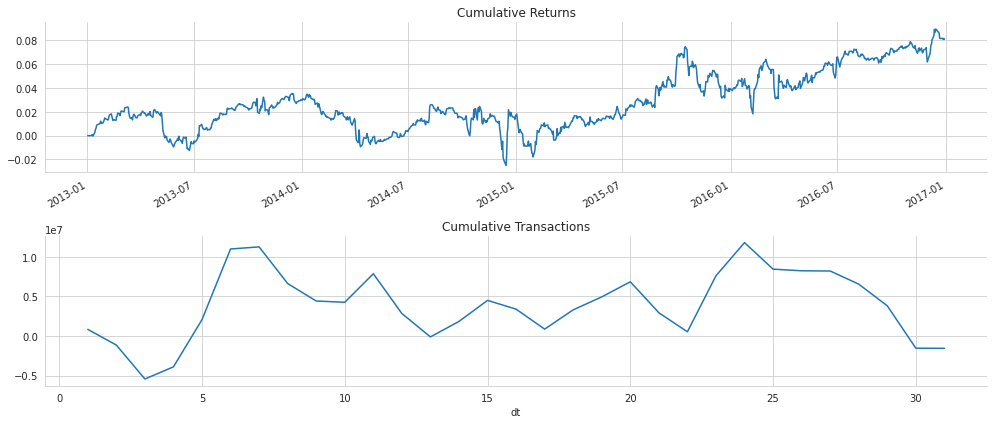

In [ ]:
fig, axes= plt.subplots(nrows=2, figsize=(14,6))
returns.add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Returns')
transactions.groupby(transactions.dt.dt.day).txn_dollars.sum().cumsum().plot(ax=axes[1], title='Cumulative Transactions')
fig.tight_layout()
sns.despine();

In [ ]:
positions.index = positions.index.date

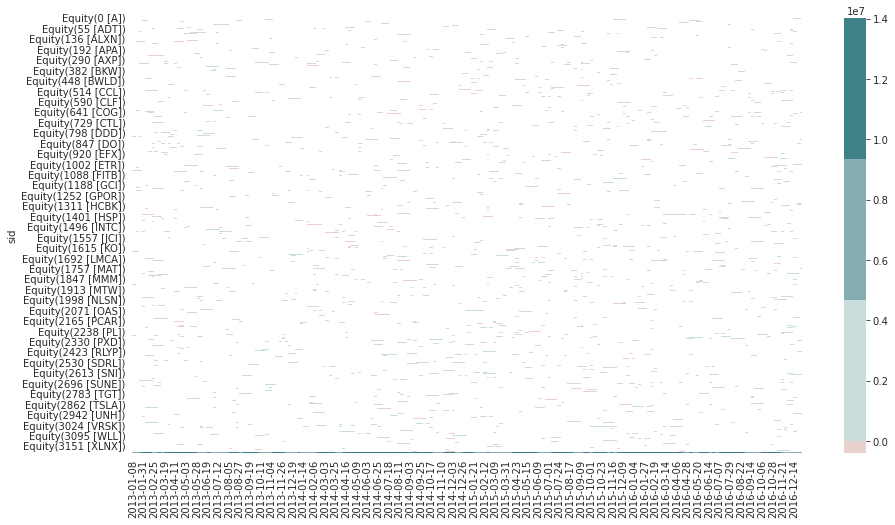

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(positions.replace(0, np.nan).dropna(how='all', axis=1).T, 
            cmap=sns.diverging_palette(h_neg=20, h_pos=200), ax=ax, center=0);

In [ ]:
positions.head()

sid,Equity(0 [A]),Equity(1 [AA]),Equity(2 [AAL]),Equity(7 [AAP]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(13 [ABC]),Equity(20 [ABT]),Equity(21 [ACAD]),Equity(27 [ACE]),...,Equity(3156 [XOM]),Equity(3162 [XPO]),Equity(3165 [XRX]),Equity(3171 [YELP]),Equity(3172 [YHOO]),Equity(3175 [YUM]),Equity(3180 [ZBH]),Equity(3194 [ZNGA]),Equity(3197 [ZTS]),cash
2013-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.441446e+06
2013-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06
2013-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.379079e+06


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6505 entries, 2013-01-08 21:00:00+00:00 to 2016-12-30 21:00:00+00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   sid          6505 non-null   object             
 1   symbol       6505 non-null   object             
 2   price        6505 non-null   float64            
 3   order_id     6502 non-null   object             
 4   amount       6505 non-null   int64              
 5   commission   0 non-null      object             
 6   dt           6505 non-null   datetime64[ns, UTC]
 7   txn_dollars  6505 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 457.4+ KB


#### 평균 분산 최적화의 대안
-  평균 분산 최적화 문제에 대한 정확한 입력의 이슈로 평균, 분산, 또는 둘 모두를 제약하거나 혹은 리스크 패리티 접근법과 같이 더 도전적으로 수익률 추정을 생략하는 여러 실용적인 대안의 채택이 이뤄짐

- 1/n 포트폴리오
    - 동일 가중 포트폴리오

- 최소 분산 포트폴리오
    - 글로벌 최소 분산(GMV, Global Minimum Variance) 포트폴리오
    - 리스크 최소화를 가장 우선시함

<pre>
<code>
def min_vol(mean_ret, cov, short = False):
    return minimize(fun=portfoli_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds=((-1 if short else 0, 1), ) *
                        n_assets,
                        constraints=weight_constraint,
                        options={'tol': 1e-10, 'maxiter': 1e4})
</code>
</pre>

- 글로벌 포트폴리오 최적화 : 블랙-리터만 접근법
    - 시장이 CAPM 균형 모델로 암시하는 바와 같이 평균 분산 포트폴리오라는 가정에서 출발해 관측된 시가 총액이 시장에 의해 할당된 최적 가중치로 간줄할 수 있따는 사실에 근거함


- 배팅의 크기를 정하는 방법: 켈리 공식
    - 무한 반복 배팅의 가치 성장률 G를 최대화하는 것을 목표로함
    

# How to size your bets - The Kelly Rule

he Kelly rule has a long history in gambling because it provides guidance on how much to stake on each of an (infinite) sequence of bets with varying (but favorable) odds to maximize terminal wealth. It was published as A New Interpretation of the Information Rate in 1956 by John Kelly who was a colleague of Claude Shannon's at Bell Labs. He was intrigued by bets placed on candidates at the new quiz show The $64,000 Question, where a viewer on the west coast used the three-hour delay to obtain insider information about the winners. 

Kelly drew a connection to Shannon's information theory to solve for the bet that is optimal for long-term capital growth when the odds are favorable, but uncertainty remains. His rule maximizes logarithmic wealth as a function of the odds of success of each game, and includes implicit bankruptcy protection since log(0) is negative infinity so that a Kelly gambler would naturally avoid losing everything.

## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
from pathlib import Path

import numpy as np
from numpy.linalg import inv
from numpy.random import dirichlet
import pandas as pd

from sympy import symbols, solve, log, diff
from scipy.optimize import minimize_scalar, newton, minimize
from scipy.integrate import quad
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
np.random.seed(42)

In [ ]:
DATA_STORE = Path('..', 'data', 'assets.h5')

## The optimal size of a bet

Kelly began by analyzing games with a binary win-lose outcome. The key variables are:
- b: The odds define the amount won for a \\$1 bet. Odds = 5/1 implies a \\$5 gain if the bet wins, plus recovery of the \\$1 capital.
- p: The probability defines the likelihood of a favorable outcome.
- f: The share of the current capital to bet.
- V: The value of the capital as a result of betting.

The Kelly rule aims to maximize the value's growth rate, G, of infinitely-repeated bets (see Chapter 5 for background).
$$G=\lim_{N\rightarrow\infty}=\frac{1}{N}\log\frac{V_N}{V_0}$$

We can maximize the rate of growth G by maximizing G with respect to f, as illustrated using sympy as follows:

In [ ]:
share, odds, probability = symbols('share odds probability')
Value = probability * log(1 + odds * share) + (1 - probability) * log(1 - share)
solve(diff(Value, share), share)

[(odds*probability + probability - 1)/odds]

In [ ]:
f, p = symbols('f p')
y = p * log(1 + f) + (1 - p) * log(1 - f)
solve(diff(y, f), f)

[2*p - 1]

## Get S&P 500 Data

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    sp500 = store['sp500/stooq'].close

### Compute Returns & Standard Deviation

In [ ]:
annual_returns = sp500.resample('A').last().pct_change().dropna().to_frame('sp500')

In [ ]:
return_params = annual_returns.sp500.rolling(25).agg(['mean', 'std']).dropna()

In [ ]:
return_ci = (return_params[['mean']]
                .assign(lower=return_params['mean'].sub(return_params['std'].mul(2)))
                .assign(upper=return_params['mean'].add(return_params['std'].mul(2))))

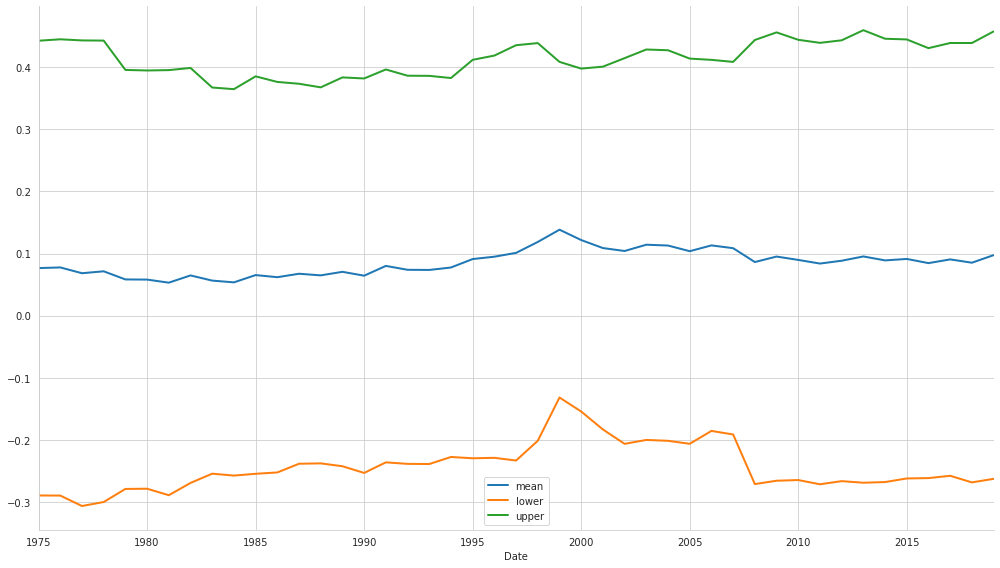

In [ ]:
return_ci.plot(lw=2, figsize=(14, 8))
plt.tight_layout()
sns.despine();

### Kelly Rule for a Single Asset - Index Returns

In a financial market context, both outcomes and alternatives are more complex, but the Kelly rule logic does still apply. It was made popular by Ed Thorp, who first applied it profitably to gambling (described in Beat the Dealer) and later started the successful hedge fund Princeton/Newport Partners.

With continuous outcomes, the growth rate of capital is defined by an integrate over the probability distribution of the different returns that can be optimized numerically.
We can solve this expression (see book) for the optimal f* using the `scipy.optimize` module:

In [ ]:
def norm_integral(f, mean, std):
    val, er = quad(lambda s: np.log(1 + f * s) * norm.pdf(s, mean, std), 
                               mean - 3 * std, 
                               mean + 3 * std)
    return -val

In [ ]:
def norm_dev_integral(f, mean, std):
    val, er = quad(lambda s: (s / (1 + f * s)) * norm.pdf(s, mean, std), m-3*std, mean+3*std)
    return val

In [ ]:
def get_kelly_share(data):
    solution = minimize_scalar(norm_integral, 
                        args=(data['mean'], data['std']), 
                        bounds=[0, 2], 
                        method='bounded') 
    return solution.x

In [ ]:
annual_returns['f'] = return_params.apply(get_kelly_share, axis=1)

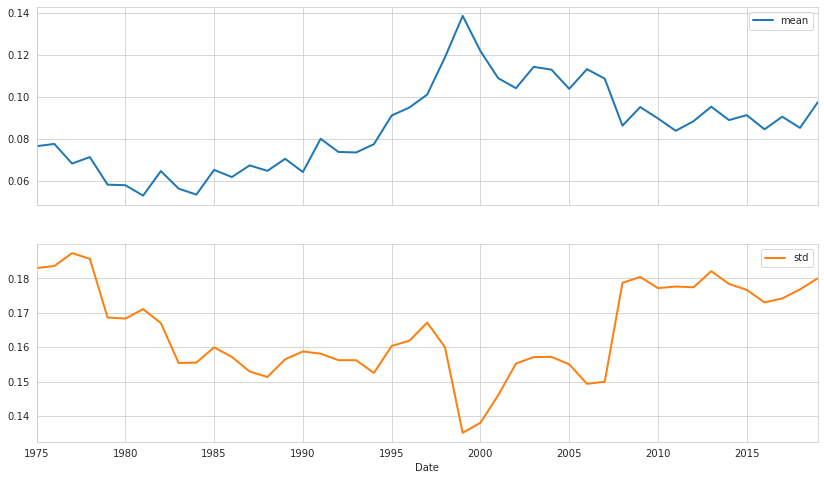

In [ ]:
return_params.plot(subplots=True, lw=2, figsize=(14, 8));

In [ ]:
annual_returns.tail()

,sp500,f
Date,,
2015-12-31,-0.007266,1.999996
2016-12-31,0.095350,1.999996
2017-12-31,0.194200,1.999996
2018-12-31,-0.062373,1.999996
2019-12-31,0.288781,1.999996


### Performance Evaluation

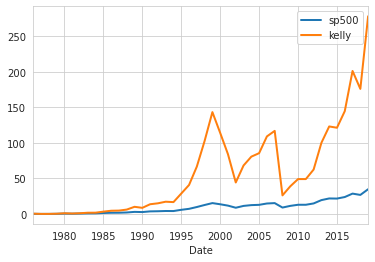

In [ ]:
(annual_returns[['sp500']]
 .assign(kelly=annual_returns.sp500.mul(annual_returns.f.shift()))
 .dropna()
 .loc['1900':]
 .add(1)
 .cumprod()
 .sub(1)
 .plot(lw=2));


In [ ]:
annual_returns.f.describe()

count    45.000000
mean      1.979025
std       0.062282
min       1.708206
25%       1.999996
50%       1.999996
75%       1.999996
max       1.999996
Name: f, dtype: float64

In [ ]:
return_ci.head()

,mean,lower,upper
Date,,,
1975-12-31,0.076574,-0.289442,0.442591
1976-12-31,0.077649,-0.289600,0.444897
1977-12-31,0.068336,-0.306402,0.443074
1978-12-31,0.071410,-0.299973,0.442794
1979-12-31,0.058325,-0.278930,0.395581


### Compute Kelly Fraction

In [ ]:
m = .058
s = .216

In [ ]:
# Option 1: minimize the expectation integral
sol = minimize_scalar(norm_integral, args=(m, s), bounds=[0., 2.], method='bounded')
print('Optimal Kelly fraction: {:.4f}'.format(sol.x))

Optimal Kelly fraction: 1.1974


In [ ]:
# Option 2: take the derivative of the expectation and make it null
x0 = newton(norm_dev_integral, .1, args=(m, s))
print('Optimal Kelly fraction: {:.4f}'.format(x0))

Optimal Kelly fraction: 1.1974


## Kelly Rule for Multiple Assets

We will use an example with various equities. [E. Chan (2008)](https://www.amazon.com/Quantitative-Trading-Build-Algorithmic-Business/dp/0470284889) illustrates how to arrive at a multi-asset application of the Kelly Rule, and that the result is equivalent to the (potentially levered) maximum Sharpe ratio portfolio from the mean-variance optimization. 

The computation involves the dot product of the precision matrix, which is the inverse of the covariance matrix, and the return matrix:

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    sp500_stocks = store['sp500/stocks'].index 
    prices = store['quandl/wiki/prices'].adj_close.unstack('ticker').filter(sp500_stocks)

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14277 entries, 1962-01-02 to 2018-03-27
Columns: 482 entries, MMM to ZTS
dtypes: float64(482)
memory usage: 52.6 MB


In [ ]:
monthly_returns = prices.loc['1988':'2017'].resample('M').last().pct_change().dropna(how='all').dropna(axis=1)
stocks = monthly_returns.columns
monthly_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 1988-02-29 to 2017-12-31
Freq: M
Columns: 207 entries, MMM to XRX
dtypes: float64(207)
memory usage: 583.4 KB


### Compute Precision Matrix

In [ ]:
cov = monthly_returns.cov()
precision_matrix = pd.DataFrame(inv(cov), index=stocks, columns=stocks)

In [ ]:
kelly_allocation = monthly_returns.mean().dot(precision_matrix)

In [ ]:
kelly_allocation.describe()

count    207.000000
mean       0.237375
std        3.470213
min      -11.586454
25%       -1.750238
50%        0.093455
75%        2.505289
max        9.255888
dtype: float64

In [ ]:
kelly_allocation.sum()

49.13669441959205

### Largest Portfolio Allocation

The plot shows the tickers that receive an allocation weight > 5x their value:

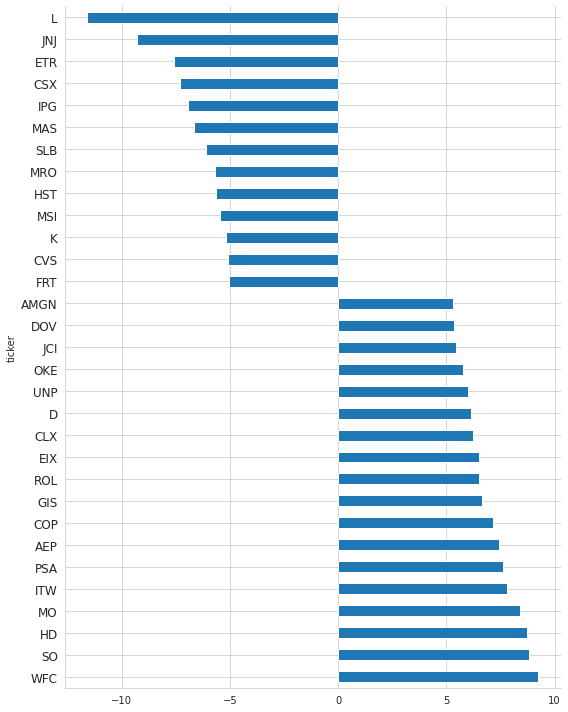

In [ ]:
kelly_allocation[kelly_allocation.abs()>5].sort_values(ascending=False).plot.barh(figsize=(8, 10))
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout();

### Performance vs SP500

The Kelly rule does really well. But it has also been computed from historical data..

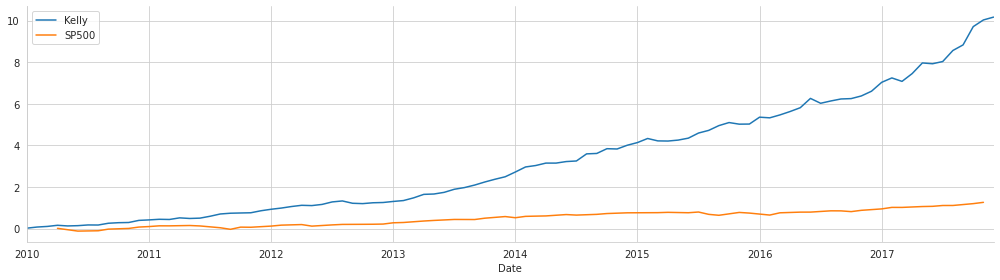

In [ ]:
ax = monthly_returns.loc['2010':].mul(kelly_allocation.div(kelly_allocation.sum())).sum(1).to_frame('Kelly').add(1).cumprod().sub(1).plot(figsize=(14,4));
sp500.filter(monthly_returns.loc['2010':].index).pct_change().add(1).cumprod().sub(1).to_frame('SP500').plot(ax=ax, legend=True)
plt.tight_layout()
sns.despine();

### 리스크 팩터 투자
- 입력 변수를 추정하기 위한 대안적인 프레임워크는 자산의 리스크와 수익률을 유발하는 근본적인 결정 팩터나 팩터를 처리하는 것임
- 팩터가 수익률에 어떤 영향을 미치는지를 이해한다면 더 좋은 포트폴리오를 구축할 수 있음
- 팩터 투자는 헤지 펀드 또는 사모 펀드와 같은 레이블로 투자 수단을 구분하는 것이 아니라 근본적인 리스크 팩터에 대한 노출의 차이에 근거해 고유한 리스크 수익 프로파일을 식별하는 것을 목표로함


### 계층적 리스크 패리티
- 비지도 머신러닝 기법을 활용해 더 나은 표본 외 포트폴리오 배분을 달성하게 함
- 포트폴리오 최적화의 최근 혁신은 그래프 이론과 계층적 클러스터링을 활용해 포트폴리오를 3스텝으로 구성
    1. 상고나된 자산이 서로 근접하게 거리 메트릭을 정의하고, 계층적 관계를 확인하기 위한 단일 링크 클러스터링을 적용
    2. 계층적 상관관계 구조를 사용해 곤분산 행렬을 준대각화
    3. 포트폴리오 구성에서 클러스터된 자산을 대체재가 아니라 보완재로 취급하고 자유도를 줄이고자 재귀적 이분 탐색을 사용해 하향식 역분산 가중치를 적용
    

### 집라인으로 트레이딩과 포트폴리오 관리
- 매입과 매도 주문을 내서 매입과 매도 포지션에 진입하거나 가장 최근의 거래 신호에 맞춰 보유 포지션을 조정하고자 포트폴리오를 리밸런싱함

#### 신호 생성과 거래 실행 계획 수립


# MeanReversion backtest with Portfolio Optimization

In the chapter 04, we introduced `zipline` to simulate the computation of alpha factors from trailing cross-sectional market, fundamental, and alternative data. 

Now we will exploit the alpha factors to derive and act on buy and sell signals using the custom MeanReversion factor developed in the last chapter.

## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys
from pytz import UTC
import logbook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from logbook import (NestedSetup, NullHandler, Logger, 
                     StreamHandler, StderrHandler, 
                     INFO, WARNING, DEBUG, ERROR)

from zipline import run_algorithm
from zipline.api import (attach_pipeline,
                         date_rules,
                         time_rules,
                         get_datetime,
                         order_target_percent,
                         pipeline_output,
                         record, schedule_function,
                         get_open_orders,
                         calendars,
                         set_commission, 
                         set_slippage)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, objective_functions
from pypfopt import expected_returns
from pypfopt.exceptions import OptimizationError

from pyfolio.utils import extract_rets_pos_txn_from_zipline

In [ ]:
sns.set_style('whitegrid')

## Logging Setup

In [ ]:
# setup stdout logging
format_string = '[{record.time: %H:%M:%S.%f}]: {record.level_name}: {record.message}'
zipline_logging = NestedSetup([NullHandler(level=DEBUG),
                               StreamHandler(sys.stdout, format_string=format_string, level=INFO),
                               StreamHandler(sys.stdout, format_string=format_string, level=WARNING),
                               StreamHandler(sys.stderr, level=ERROR)])
zipline_logging.push_application()
log = Logger('Algorithm')

## Algo Settings

In [ ]:
# Settings
MONTH = 21
YEAR = 12 * MONTH
N_LONGS = 50
N_SHORTS = 50
MIN_POS = 5
VOL_SCREEN = 1000

In [ ]:
start = pd.Timestamp('2013-01-01', tz=UTC)
end = pd.Timestamp('2017-01-01', tz=UTC)
capital_base = 1e7

## Mean Reversion Factor

In [ ]:
class MeanReversion(CustomFactor):
    """Compute ratio of latest monthly return to 12m average,
       normalized by std dev of monthly returns"""
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        df = pd.DataFrame(monthly_returns)
        factor = df.iloc[-1].sub(df.mean()).div(df.std())
        out[:] = factor

## Create Pipeline

The Pipeline created by the `compute_factors()` method returns a table with a long and a short column for the 25 stocks with the largest negative and positive deviations of their last monthly return from its annual average, normalized by the standard deviation. It also limited the universe to the 500 stocks with the highest average trading volume over the last 30 trading days. 

In [ ]:
def compute_factors():
    """Create factor pipeline incl. mean reversion,
        filtered by 30d Dollar Volume; capture factor ranks"""
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)
    return Pipeline(columns={'longs'  : mean_reversion.bottom(N_LONGS),
                             'shorts' : mean_reversion.top(N_SHORTS),
                             'ranking': mean_reversion.rank(ascending=False)},
                    screen=dollar_volume.top(VOL_SCREEN))

`Before_trading_start()` ensures the daily execution of the pipeline and the recording of the results, including the current prices.

In [ ]:
def before_trading_start(context, data):
    """Run factor pipeline"""
    context.factor_data = pipeline_output('factor_pipeline')
    record(factor_data=context.factor_data.ranking)
    assets = context.factor_data.index
    record(prices=data.current(assets, 'price'))

## Set up Rebalancing

The new `rebalance()` method submits trade orders to the `exec_trades()` method for the assets flagged for long and short positions by the pipeline with equal positive and negative weights. 

It also divests any current holdings that are no longer included in the factor signals:

In [ ]:
def exec_trades(data, positions):
    """Place orders for assets using target portfolio percentage"""
    for asset, target_percent in positions.items():
        if data.can_trade(asset) and not get_open_orders(asset):
            order_target_percent(asset, target_percent)

In [ ]:
def rebalance(context, data):
    """Compute long, short and obsolete holdings; place orders"""

    factor_data = context.factor_data
    assets = factor_data.index

    longs = assets[factor_data.longs]
    shorts = assets[factor_data.shorts]
    
    divest = context.portfolio.positions.keys() - longs.union(shorts)
    exec_trades(data, positions={asset: 0 for asset in divest})
    log.info('{} | {:11,.0f}'.format(get_datetime().date(), 
                                   context.portfolio.portfolio_value))

    # get price history
    prices = data.history(assets, fields='price',
                          bar_count=252+1, # for 1 year of returns 
                          frequency='1d')
    
    # get optimal weights if sufficient candidates
    if len(longs) > MIN_POS and len(shorts) > MIN_POS:
        try:
            long_weights = optimize_weights(prices.loc[:, longs])
            short_weights = optimize_weights(prices.loc[:, shorts], short=True)
            
            exec_trades(data, positions=long_weights)
            exec_trades(data, positions=short_weights)
        except Exception as e:
            log.warn('{} {}'.format(get_datetime().date(), e))
    # exit remaining positions
    divest_pf = {asset: 0 for asset in context.portfolio.positions.keys()}
    exec_trades(data, positions=divest_pf)

## Optimize Portfolio Weights

In [ ]:
def optimize_weights(prices, short=False):

    returns = expected_returns.mean_historical_return(
        prices=prices, frequency=252)
    cov = risk_models.sample_cov(prices=prices, frequency=252)

    # get weights that maximize the Sharpe ratio
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(0, 1),
                           solver='SCS')
    ef.max_sharpe()
    if short:
        return {asset: -weight for asset, weight in ef.clean_weights().items()}
    else:
        return ef.clean_weights()

## Initialize Backtest

The `rebalance()` method runs according to `date_rules` and `time_rules` set by the `schedule_function()` utility at the beginning of the week, right after `market_open` as stipulated by the built-in `US_EQUITIES` calendar (see docs for details on rules). 

You can also specify a trade commission both in relative terms and as a minimum amount. There is also an option to define slippage, which is the cost of an adverse change in price between trade decision and execution

In [ ]:
def initialize(context):
    """Setup: register pipeline, schedule rebalancing,
        and set trading params"""
    attach_pipeline(compute_factors(), 'factor_pipeline')
    schedule_function(rebalance,
                      date_rules.week_start(),
                      time_rules.market_open(),
                      calendar=calendars.US_EQUITIES)

    set_commission(us_equities=commission.PerShare(cost=0.00075, min_trade_cost=.01))
    set_slippage(us_equities=slippage.VolumeShareSlippage(volume_limit=0.0025, price_impact=0.01))

## Run Algorithm

The algorithm executes upon calling the `run_algorithm()` function and returns the backtest performance `DataFrame`.

In [ ]:
backtest = run_algorithm(start=start,
                         end=end,
                         initialize=initialize,
                         before_trading_start=before_trading_start,
                         bundle='quandl',
                         capital_base=capital_base)

[ 19:49:55.661120]: INFO: 2013-01-07 |  10,000,000
[ 19:50:02.961404]: INFO: 2013-01-14 |   9,922,439
[ 19:50:06.101723]: INFO: 2013-01-22 |   9,913,612
[ 19:50:09.110052]: INFO: 2013-01-28 |   9,968,656
[ 19:50:12.293743]: INFO: 2013-02-04 |  10,079,391
[ 19:50:15.636407]: INFO: 2013-02-11 |  10,103,535
[ 19:50:19.025936]: INFO: 2013-02-19 |   9,771,077
[ 19:50:22.454159]: INFO: 2013-02-25 |  10,061,824
[ 19:50:26.025560]: INFO: 2013-03-04 |  10,162,312
[ 19:50:29.300896]: INFO: 2013-03-11 |   9,563,302
[ 19:50:33.294339]: INFO: 2013-03-18 |   9,311,865
[ 19:50:36.611748]: INFO: 2013-03-25 |   9,064,119
[ 19:50:39.810862]: INFO: 2013-04-01 |   8,643,936
[ 19:50:43.357770]: INFO: 2013-04-08 |   8,721,979
[ 19:50:47.126182]: INFO: 2013-04-15 |   8,552,107
[ 19:50:51.070580]: INFO: 2013-04-22 |   8,186,845
[ 19:50:55.027566]: INFO: 2013-04-29 |   9,080,169
[ 19:50:58.655614]: INFO: 2013-05-06 |   8,277,424
[ 19:51:02.617136]: INFO: 2013-05-13 |   8,018,122
[ 19:51:06.524561]: INFO: after

[ 19:57:36.855101]: INFO: 2015-12-28 |   9,167,269
[ 19:57:38.942283]: INFO: 2016-01-04 |   8,890,359
[ 19:57:41.091240]: INFO: 2016-01-11 |   7,867,946
[ 19:57:43.371758]: INFO: 2016-01-19 |   7,562,504
[ 19:57:47.218014]: INFO: 2016-01-25 |   7,257,377
[ 19:57:48.692725]: WARNING: 2016-01-25 ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
[ 19:57:49.570712]: INFO: 2016-02-01 |   7,359,763
[ 19:57:51.939493]: INFO: 2016-02-08 |   4,641,970
[ 19:57:54.339881]: INFO: 2016-02-16 |   5,248,988
[ 19:57:56.978133]: INFO: 2016-02-22 |   7,136,137
[ 19:57:59.381385]: INFO: 2016-02-29 |   6,489,040
[ 19:58:01.786348]: INFO: 2016-03-07 |   7,469,882
[ 19:58:04.176099]: INFO: 2016-03-14 |   8,954,946
[ 19:58:06.530112]: INFO: 2016-03-21 |   9,471,995
[ 19:58:08.022997]: WARNING: 2016-03-21 ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')
[ 19:58:08.684584]: INFO: 2016-03-28 |   9,328,094
[ 19

## Extract pyfolio Inputs

The `extract_rets_pos_txn_from_zipline` utility provided by `pyfolio` extracts the data used to compute performance metrics.

In [ ]:
returns, positions, transactions = extract_rets_pos_txn_from_zipline(backtest)

## Persist Results for use with `pyfolio`

In [ ]:
with pd.HDFStore('backtests.h5') as store:
    store.put('returns/pf_opt', returns)
    store.put('transactions/pf_opt', transactions)

In [ ]:
with pd.HDFStore('backtests.h5') as store:
    returns_pf = store['returns/pf_opt']
    tx_pf = store['transactions/pf_opt']
    returns_ew = store['returns/equal_weight']
    tx_ew = store['transactions/equal_weight']

## Plot Results

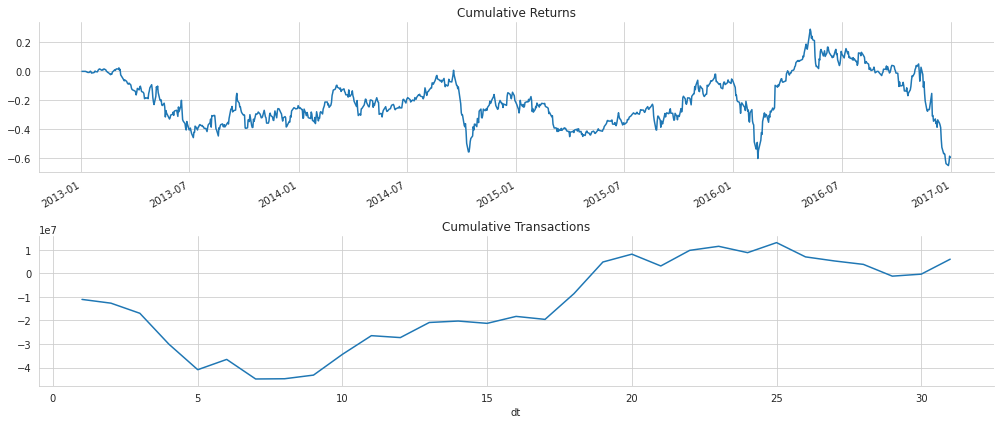

In [ ]:
fig, axes= plt.subplots(nrows=2, figsize=(14,6))
returns.add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Returns')
transactions.groupby(transactions.dt.dt.day).txn_dollars.sum().cumsum().plot(ax=axes[1], title='Cumulative Transactions')
sns.despine()
fig.tight_layout();

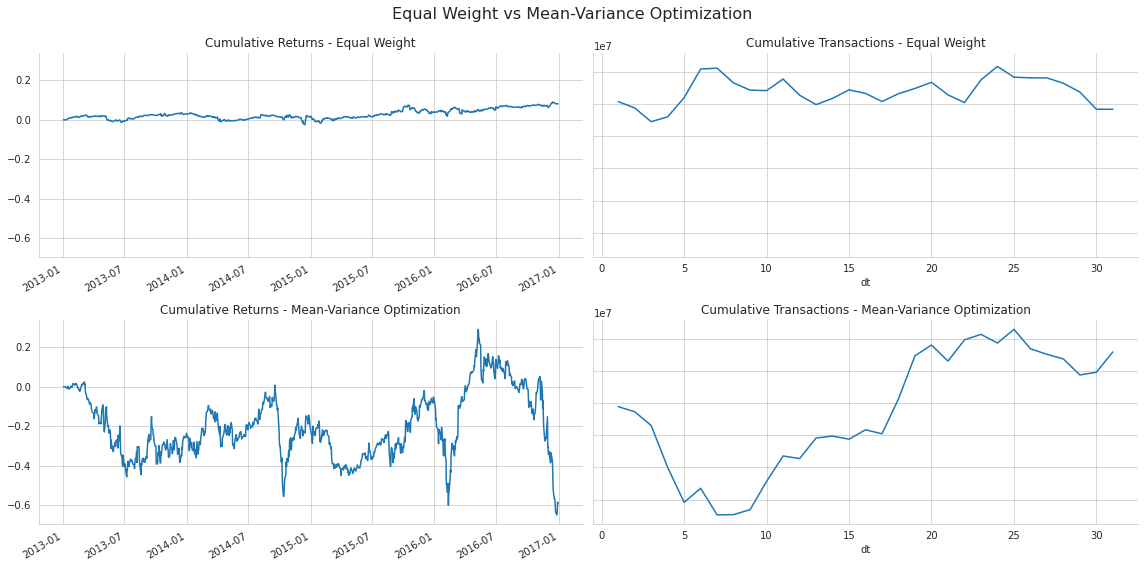

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), sharey='col')
returns_ew.add(1).cumprod().sub(1).plot(ax=axes[0][0],
                                        title='Cumulative Returns - Equal Weight')
returns_pf.add(1).cumprod().sub(1).plot(ax=axes[1][0],
                                        title='Cumulative Returns - Mean-Variance Optimization')
tx_ew.groupby(tx_ew.dt.dt.day).txn_dollars.sum().cumsum().plot(ax=axes[0][1],
                                                               title='Cumulative Transactions - Equal Weight')
tx_pf.groupby(tx_pf.dt.dt.day).txn_dollars.sum().cumsum().plot(ax=axes[1][1],
                                                               title='Cumulative Transactions - Mean-Variance Optimization')
fig.suptitle('Equal Weight vs Mean-Variance Optimization', fontsize=16)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

### 파이폴리오를 이용한 백테스팅 성과 측정
- 파이폴리오(pyfolio)는 풍부한 매트릭과 기각화 집합을 사용해 표본 내 및 표본 외 모두에서 포트폴리오 성과 분석을 용이하게 해준다.
- 여러 내장 시나리오를 사용해 수익퓰, 포지션, 거래 분석은 물론 시장 스트레스 기간 동안의 이벤트 리스크를 다루는 테어시트(tear sheet)를 생성함

#### 표본외 수익률로 전진 분석
- 전진 분석은 과거 데이터를 포함해서 알파 팩터 파라미터를 미세 조정하고자 사용되는 표본 긴간
- 전진 분석은 새로운 시장 데이터에 대한 전략을 시뮬레이션해 표본에서 잘 수행되고 특정 과거 상황에 너무 밀접하게 맞춤화되지 않았는지 검증함



# From `zipline` to `pyfolio`

[Pyfolio](http://quantopian.github.io/pyfolio/) facilitates the analysis of portfolio performance and risk in-sample and out-of-sample using many standard metrics. It produces tear sheets covering the analysis of returns, positions, and transactions, as well as event risk during periods of market stress using several built-in scenarios, and also includes Bayesian out-of-sample performance analysis.

* Open-source backtester by Quantopian Inc.
* Powers Quantopian.com
* State-of-the-art portfolio and risk analytics
* Various models for transaction costs and slippage.
* Open source and free: Apache v2 license
* Can be used:
   - stand alone
   - with Zipline
   - on Quantopian

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyfolio.utils import extract_rets_pos_txn_from_zipline
from pyfolio.plotting import (plot_perf_stats,
                              show_perf_stats,
                              plot_rolling_beta,
                              plot_rolling_returns,
                              plot_rolling_sharpe,
                              plot_drawdown_periods,
                              plot_drawdown_underwater)

from pyfolio.timeseries import perf_stats, extract_interesting_date_ranges

In [ ]:
sns.set_style('whitegrid')

## Converting data from zipline to pyfolio

In [ ]:
with pd.HDFStore('backtests.h5') as store:
    backtest = store['backtest/equal_weight']
backtest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2013-01-02 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              1008 non-null   datetime64[ns, UTC]
 1   period_close             1008 non-null   datetime64[ns, UTC]
 2   starting_cash            1008 non-null   float64            
 3   ending_cash              1008 non-null   float64            
 4   portfolio_value          1008 non-null   float64            
 5   returns                  1008 non-null   float64            
 6   longs_count              1008 non-null   int64              
 7   shorts_count             1008 non-null   int64              
 8   long_value               1008 non-null   float64            
 9   short_value              1008 non-null   float64            
 10  long_exposure            1008 non-null   float64

`pyfolio` relies on portfolio returns and position data, and can also take into account the transaction costs and slippage losses of trading activity. The metrics are computed using the empyrical library that can also be used on a standalone basis. The performance DataFrame produced by the zipline backtesting engine can be translated into the requisite pyfolio input.

In [ ]:
returns, positions, transactions = extract_rets_pos_txn_from_zipline(backtest)

In [ ]:
returns.head().append(returns.tail())

2013-01-02 00:00:00+00:00    0.000000
2013-01-03 00:00:00+00:00    0.000000
2013-01-04 00:00:00+00:00    0.000000
2013-01-07 00:00:00+00:00    0.000000
2013-01-08 00:00:00+00:00   -0.000005
2016-12-23 00:00:00+00:00   -0.000233
2016-12-27 00:00:00+00:00    0.000160
2016-12-28 00:00:00+00:00   -0.000847
2016-12-29 00:00:00+00:00    0.000735
2016-12-30 00:00:00+00:00   -0.000606
Name: returns, dtype: float64

In [ ]:
positions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2013-01-08 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Columns: 750 entries, Equity(0 [A]) to cash
dtypes: float64(750)
memory usage: 5.8 MB


In [ ]:
positions.columns = [c for c in positions.columns[:-1]] + ['cash']
positions.index = positions.index.normalize()
positions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2013-01-08 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Columns: 750 entries, Equity(0 [A]) to cash
dtypes: float64(750)
memory usage: 5.8 MB


In [ ]:
transactions.symbol = transactions.symbol.apply(lambda x: x.symbol)

In [ ]:
transactions.head().append(transactions.tail())

,sid,symbol,price,order_id,amount,commission,dt,txn_dollars
2013-01-08 21:00:00+00:00,Equity(85 [AGN]),AGN,86.680005,eb7dbd283656403ca8c9d6c1188dc727,2334,None,2013-01-08 21:00:00+00:00,-202311.131306
2013-01-08 21:00:00+00:00,Equity(213 [ARIA]),ARIA,19.651001,682c967689d540748db436fd51d5163a,7590,None,2013-01-08 21:00:00+00:00,-149151.099321
2013-01-08 21:00:00+00:00,Equity(367 [BIIB]),BIIB,144.390001,a428261b64d4412db94a4573faa1cc04,1365,None,2013-01-08 21:00:00+00:00,-197092.351185
2013-01-08 21:00:00+00:00,Equity(811 [DFS]),DFS,40.090001,956824d7a6064717b7aef1594daa65dc,5073,None,2013-01-08 21:00:00+00:00,-203376.572741
2013-01-08 21:00:00+00:00,Equity(1059 [FDO]),FDO,57.320002,863bd8a8917b476390c04d8924fa923d,3496,None,2013-01-08 21:00:00+00:00,-200390.728571
2016-12-29 21:00:00+00:00,Equity(66 [AEO]),AEO,15.270000,ba96247cd5ee435da2c104312b81c7f7,3461,None,2016-12-29 21:00:00+00:00,-52849.470534
2016-12-29 21:00:00+00:00,Equity(833 [DKS]),DKS,52.380000,027a5f84d39549e5ad05470eb14ed268,1063,None,2016-12-29 21:00:00+00:00,-55679.940343
2016-12-29 21:00:00+00:00,Equity(1757 [MAT]),MAT,27.630000,638e5a7fee514e4091b637db8da6903c,1183,None,2016-12-29 21:00:00+00:00,-32686.290035
2016-12-30 21:00:00+00:00,Equity(2181 [PDCO]),PDCO,41.030000,5fdc0d539a0f4ccd8554dc6db26f36b2,-119,None,2016-12-30 21:00:00+00:00,4882.569999
2016-12-30 21:00:00+00:00,Equity(2953 [URBN]),URBN,28.480000,d49b7ce165dd4daaa515da54b6f2c497,-1006,None,2016-12-30 21:00:00+00:00,28650.879685


In [ ]:
HDF_PATH = Path('..', 'data', 'assets.h5')

### Sector Map

In [ ]:
assets = positions.columns[:-1]
with pd.HDFStore(HDF_PATH) as store:
    df = store.get('us_equities/stocks')['sector'].dropna()
    df = df[~df.index.duplicated()]
sector_map = df.reindex(assets).fillna('Unknown').to_dict()

### Benchmark

In [ ]:
with pd.HDFStore(HDF_PATH) as store:
    benchmark_rets = store['sp500/fred'].close.pct_change()
benchmark_rets.name = 'S&P500'
benchmark_rets = benchmark_rets.tz_localize('UTC').filter(returns.index)
benchmark_rets.tail()

DATE
2016-12-23 00:00:00+00:00    0.001252
2016-12-27 00:00:00+00:00    0.002248
2016-12-28 00:00:00+00:00   -0.008357
2016-12-29 00:00:00+00:00   -0.000293
2016-12-30 00:00:00+00:00   -0.004637
Name: S&P500, dtype: float64

In [ ]:
perf_stats(returns=returns,
           factor_returns=benchmark_rets)
#            positions=positions, 
#            transactions=transactions)

Annual return          0.019619
Cumulative returns     0.080817
Annual volatility      0.047487
Sharpe ratio           0.432879
Calmar ratio           0.336024
Stability              0.555919
Max drawdown          -0.058387
Omega ratio            1.085094
Sortino ratio          0.630497
Skew                   0.223701
Kurtosis               6.125539
Tail ratio             0.988875
Daily value at risk   -0.005901
Alpha                  0.005922
Beta                   0.121033
dtype: float64

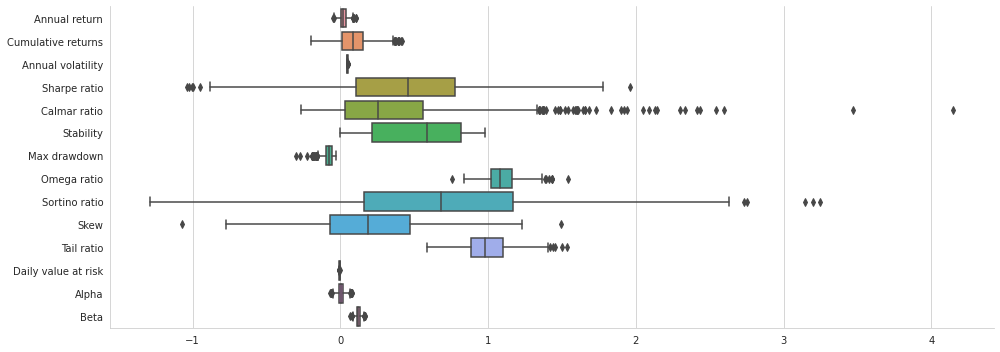

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_perf_stats(returns=returns, 
                factor_returns=benchmark_rets,     
                ax=ax)
sns.despine()
fig.tight_layout();

## Returns Analysis

Testing a trading strategy involves backtesting against historical data to fine-tune alpha factor parameters, as well as forward-testing against new market data to validate that the strategy performs well out of sample or if the parameters are too closely tailored to specific historical circumstances.

Pyfolio allows for the designation of an out-of-sample period to simulate walk-forward testing. There are numerous aspects to take into account when testing a strategy to obtain statistically reliable results, which we will address here. 

In [ ]:
oos_date = '2016-01-01'

In [ ]:
show_perf_stats(returns=returns, 
                factor_returns=benchmark_rets, 
                positions=positions, 
                transactions=transactions, 
                live_start_date=oos_date)

### Rolling Returns OOS

The `plot_rolling_returns` function displays cumulative in and out-of-sample returns against a user-defined benchmark (we are using the S&P 500):


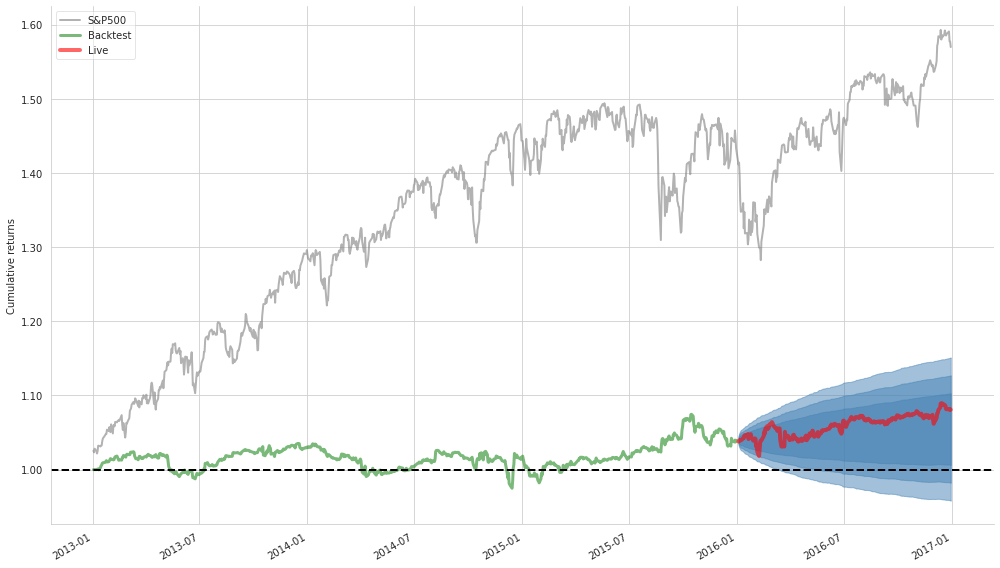

In [ ]:
plot_rolling_returns(returns=returns, 
                     factor_returns=benchmark_rets, 
                     live_start_date=oos_date, 
                     cone_std=(1.0, 1.5, 2.0))
plt.gcf().set_size_inches(14, 8)
sns.despine()
plt.tight_layout();

The plot includes a cone that shows expanding confidence intervals to indicate when out-of-sample returns appear unlikely given random-walk assumptions. Here, our strategy did not perform well against the benchmark during the simulated 2017 out-of-sample period

## Summary Performance Statistics

pyfolio offers several analytic functions and plots. The perf_stats summary displays the annual and cumulative returns, volatility, skew, and kurtosis of returns and the SR. The following additional metrics (which can also be calculated individually) are most important:
- Max drawdown: Highest percentage loss from the previous peak
- Calmar ratio: Annual portfolio return relative to maximal drawdown
- Omega ratio: The probability-weighted ratio of gains versus losses for a return target, zero per default
- Sortino ratio: Excess return relative to downside standard deviation
- Tail ratio: Size of the right tail (gains, the absolute value of the 95th percentile) relative to the size of the left tail (losses, abs. value of the 5th percentile) 
- Daily value at risk (VaR): Loss corresponding to a return two standard deviations below the daily mean
- Alpha: Portfolio return unexplained by the benchmark return
- Beta: Exposure to the benchmark

#### 성과 통계량 요약

- 최대 손실 폭 : 직전의 가장 높은 손익에서 최악의 손익까지 가장 높은 백분율 손실
- 칼마 비율 : 최대 손실 폭에 관한 연간 포트폴리오 수익률
- 오메개 비율 : 수익률 목표에 대한 손실 대 이익의 확률 가중 비율(기본값당 0)
- 소르티노 비율 : 하방 표준 편차에 관한 초과 수익률(평균보다 낮은 수익률에 대한 리스크)
- 테일 비율 : 왼쪽 꼬리(손실, 5번쨰 백분위수의 절대값)에 대한 오른쪽 꼬리의 크기
- 일별 VaR : 일평균 이하 2표준 편차 수익률에 대응하는 손실
- 알파 : 벤치마크 수익률로 설명할 수 없는 포트폴리오 수익률
- 베타 : 벤치마크 노출

### Rolling Sharpe

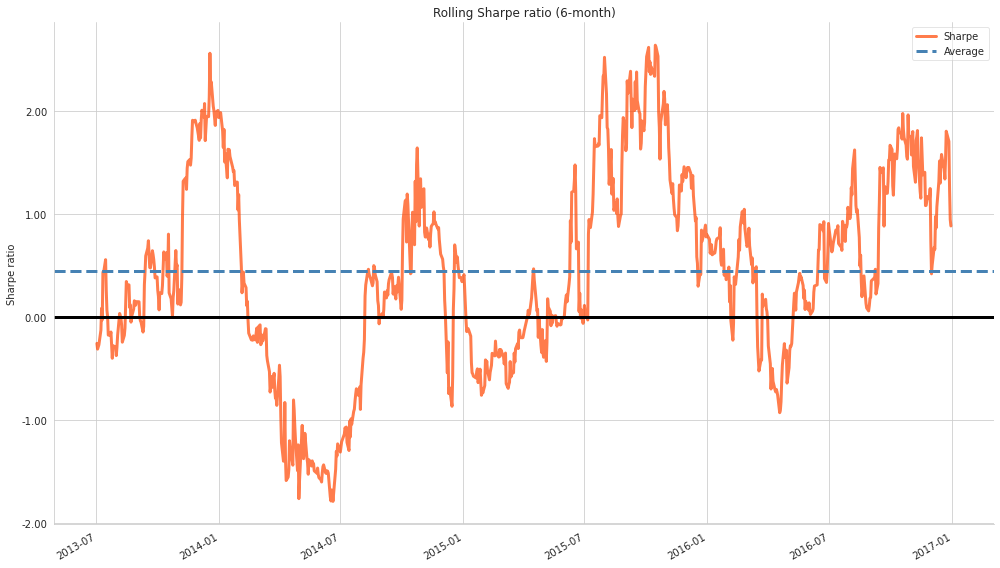

In [ ]:
plot_rolling_sharpe(returns=returns)
plt.gcf().set_size_inches(14, 8)
sns.despine()
plt.tight_layout();

### Rolling Beta

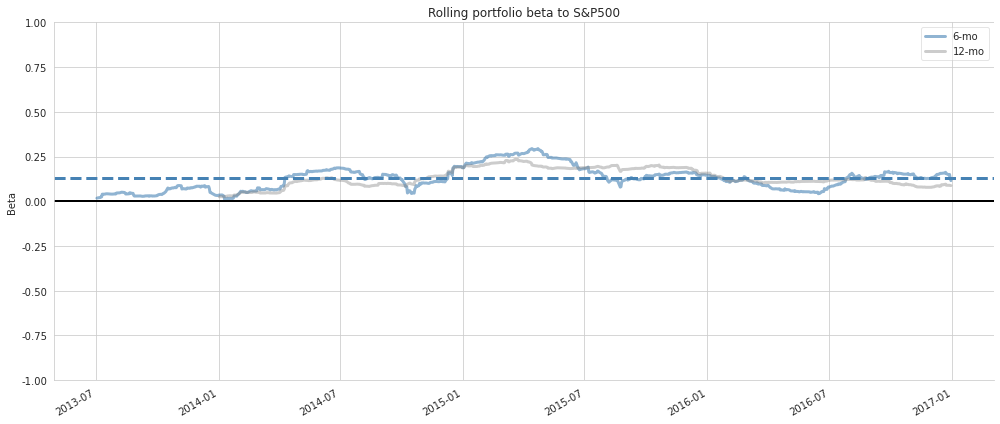

In [ ]:
plot_rolling_beta(returns=returns, factor_returns=benchmark_rets)
plt.gcf().set_size_inches(14, 6)
sns.despine()
plt.tight_layout();

## Drawdown Periods

The plot_drawdown_periods(returns) function plots the principal drawdown periods for the portfolio, and several other plotting functions show the rolling SR and rolling factor exposures to the market beta or the Fama French size, growth, and momentum factors:

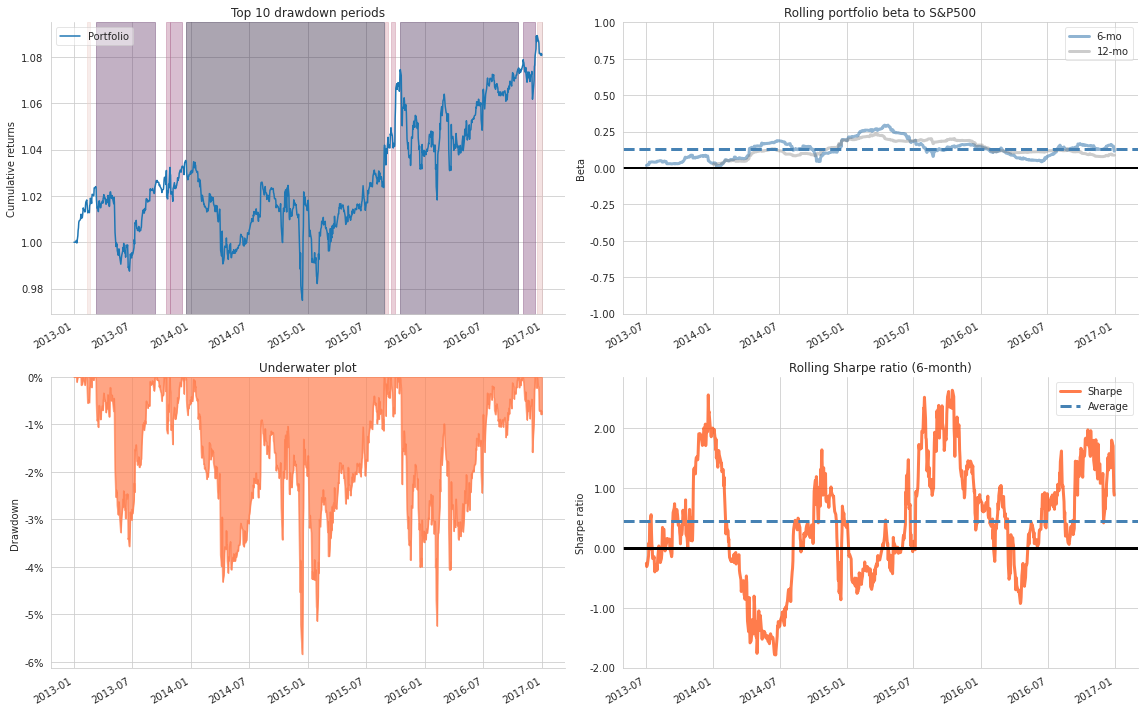

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = ax.flatten()

plot_drawdown_periods(returns=returns, ax=axes[0])
plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[1])
plot_drawdown_underwater(returns=returns, ax=axes[2])
plot_rolling_sharpe(returns=returns)
sns.despine()
plt.tight_layout();

This plot, which highlights a subset of the visualization contained in the various tear sheets, illustrates how pyfolio allows us to drill down into the performance characteristics and exposure to fundamental drivers of risk and returns.

## Modeling Event Risk

Pyfolio also includes timelines for various events that you can use to compare the performance of a portfolio to a benchmark during this period, for example, during the fall 2015 selloff following the Brexit vote.

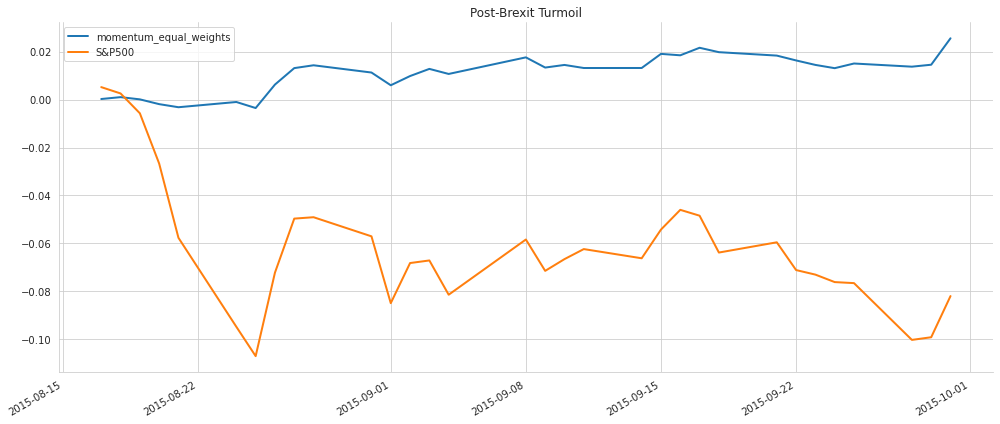

In [ ]:
interesting_times = extract_interesting_date_ranges(returns=returns)
(interesting_times['Fall2015']
 .to_frame('momentum_equal_weights').join(benchmark_rets)
 .add(1).cumprod().sub(1)
 .plot(lw=2, figsize=(14, 6), title='Post-Brexit Turmoil'))
sns.despine()
plt.tight_layout();